In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file from your local machine to Colab
uploaded = files.upload()

# Assuming the uploaded file is named 'hypothyroid.csv'
file_path = 'hypothyroid.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df

Saving hypothyroid.csv to hypothyroid.csv


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [ ]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [ ]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

In [ ]:
# df

In [ ]:
df["pregnant"].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [ ]:
df=df.replace({"t":1,"f":0})

In [ ]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,0
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,0
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,0
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,0


In [ ]:
#df['target'].isnull().sum()

In [ ]:
df['sex'].isnull().sum()

0

In [ ]:
df['sex'].value_counts()

F    2480
M    1142
?     150
Name: sex, dtype: int64

In [ ]:
df["TBG"].value_counts()

?    3772
Name: TBG, dtype: int64

In [ ]:
del df["TBG"]

In [ ]:
# df['sex'].value_counts()

In [ ]:
df=df.replace({"?":np.NAN})

In [ ]:
# df['sex'].isnull().sum()

In [ ]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [ ]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [ ]:
df=df.replace({"F":1,"M":0})

In [ ]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [ ]:
del df["referral source"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [ ]:
df["T3 measured"].value_counts()

1    3003
0     769
Name: T3 measured, dtype: int64

In [ ]:
df["TT4 measured"].value_counts()

1    3541
0     231
Name: TT4 measured, dtype: int64

In [ ]:
df["FTI measured"].value_counts()

1    3387
0     385
Name: FTI measured, dtype: int64

In [ ]:
df["TBG measured"].value_counts()

0    3772
Name: TBG measured, dtype: int64

In [ ]:
df["binaryClass"].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

In [ ]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [ ]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [ ]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [ ]:
# df['T4U measured'].mean()

In [ ]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True)

In [ ]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [ ]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [ ]:
df['T3'] = imputer.fit_transform(df[['T3']])

In [ ]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [ ]:
df['T4U'] = imputer.fit_transform(df[['T4U']])

In [ ]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [ ]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [ ]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,0


In [ ]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [ ]:
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

<ipython-input-49-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

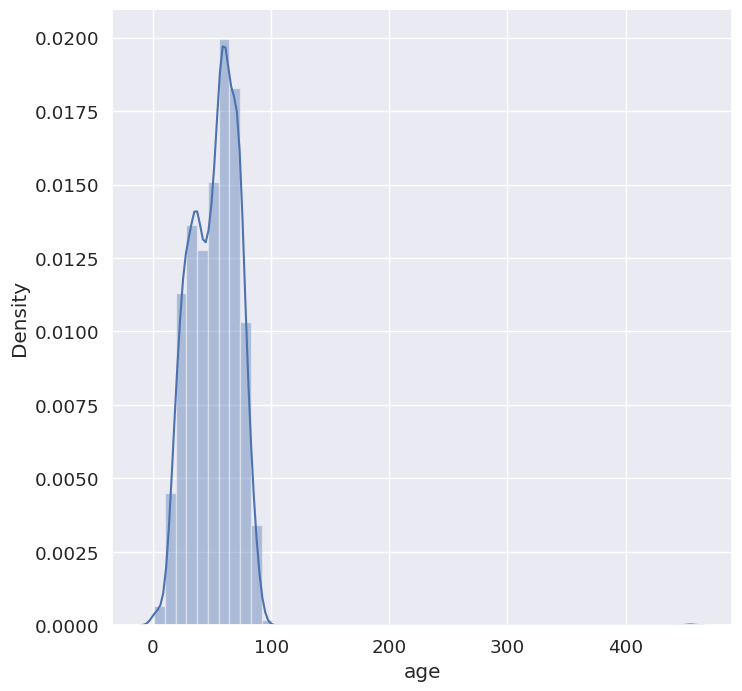

In [ ]:
sns.distplot(df['age'])

<ipython-input-50-6434e6ccc7f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'])


<Axes: xlabel='sex', ylabel='Density'>

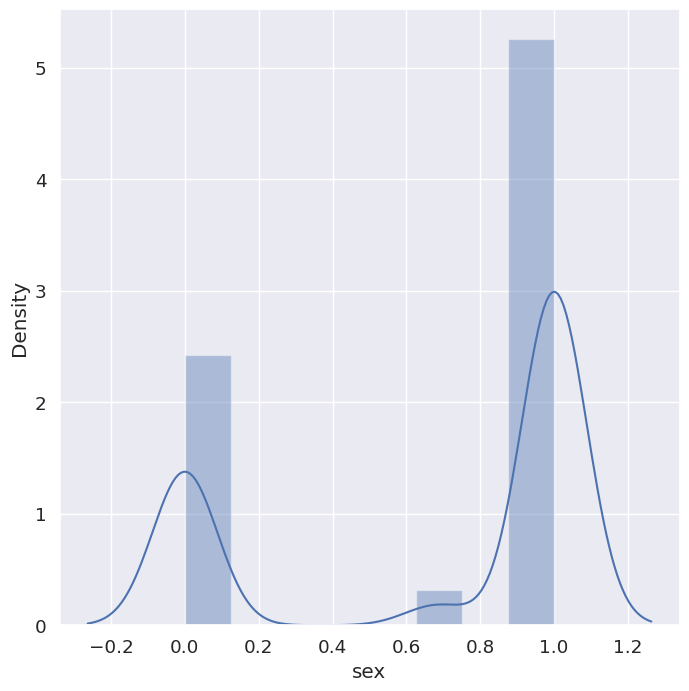

In [ ]:
sns.distplot(df['sex'])

<ipython-input-51-9a4ccb1c10c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T3'])


<Axes: xlabel='T3', ylabel='Density'>

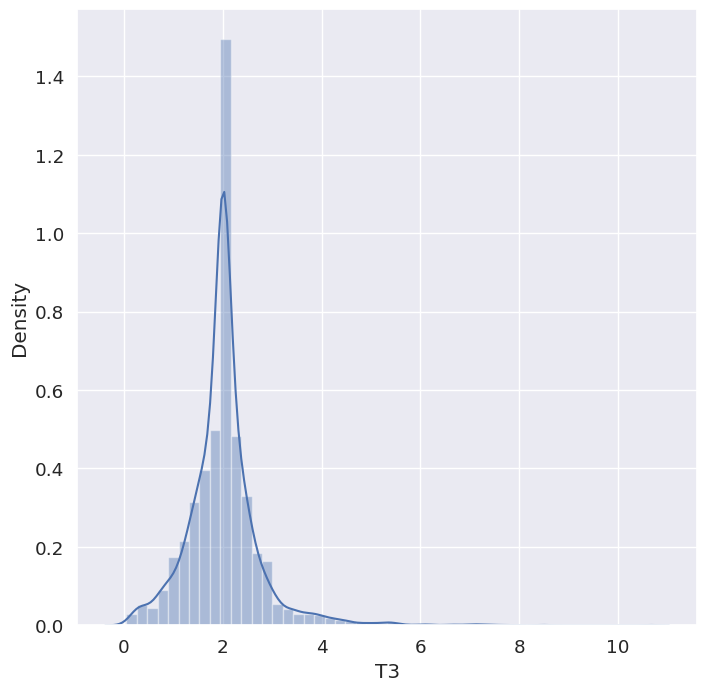

In [ ]:
sns.distplot(df['T3'])

<ipython-input-52-c3341520245c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TT4'])


<Axes: xlabel='TT4', ylabel='Density'>

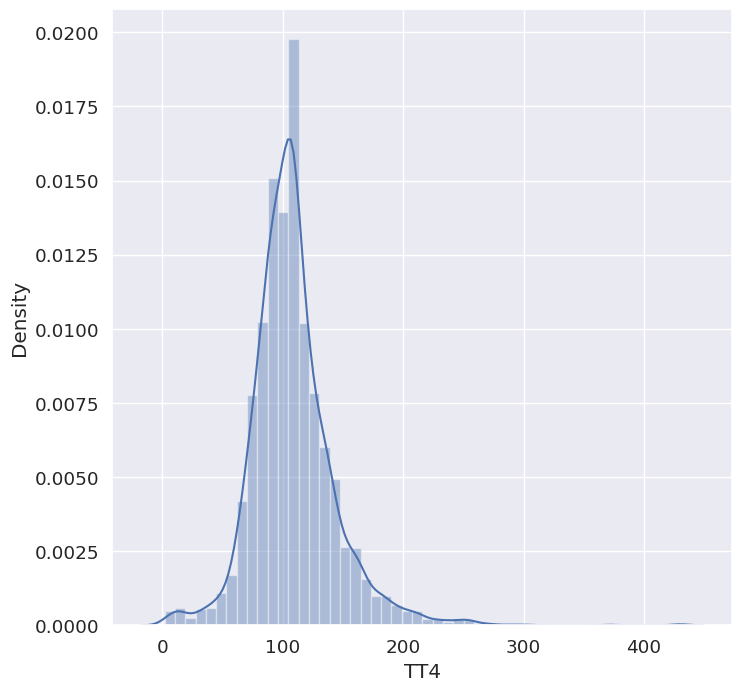

In [ ]:
sns.distplot(df['TT4'])

<ipython-input-53-87b814d510ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T4U'])


<Axes: xlabel='T4U', ylabel='Density'>

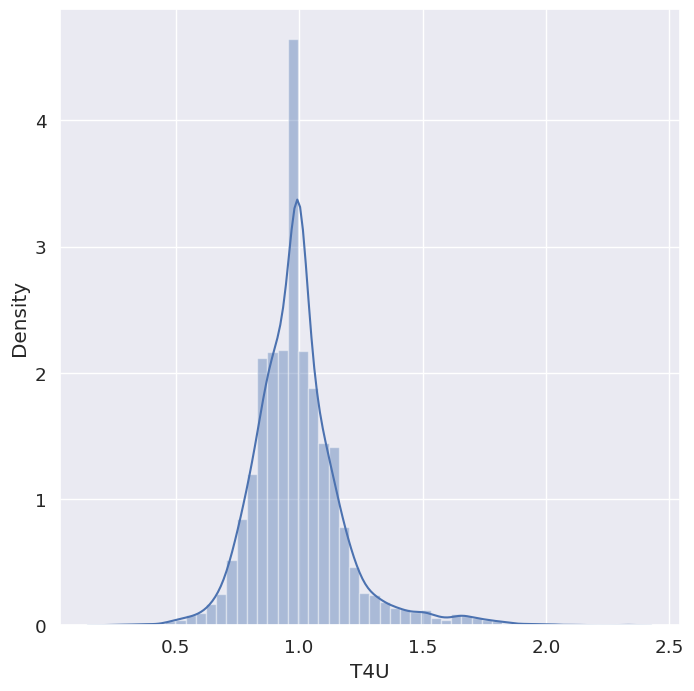

In [ ]:
sns.distplot(df['T4U'])

<ipython-input-54-52884c87dd85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FTI'])


<Axes: xlabel='FTI', ylabel='Density'>

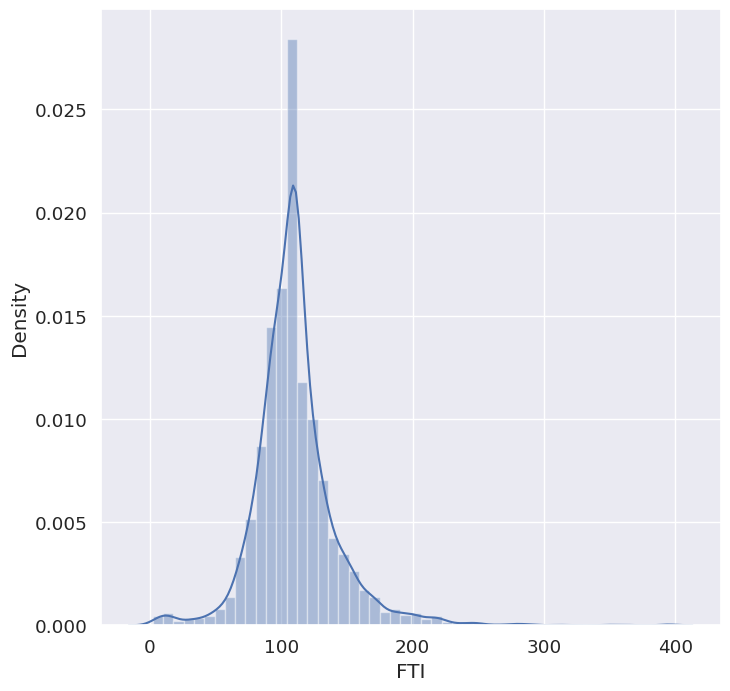

In [ ]:
sns.distplot(df['FTI'])

<ipython-input-55-c1847644a7e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TBG measured'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='TBG measured', ylabel='Density'>

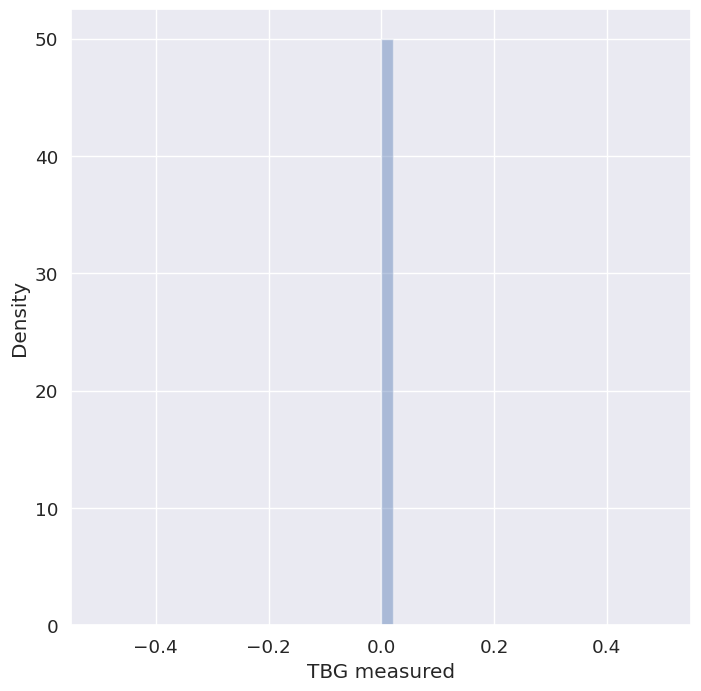

In [ ]:
sns.distplot(df['TBG measured'])

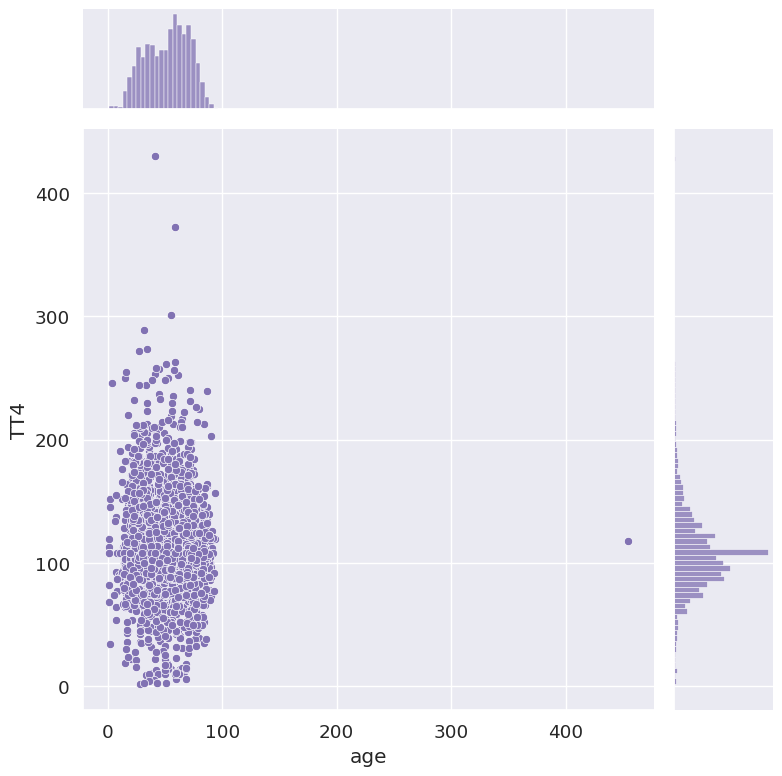

In [ ]:
sns.jointplot(x='age', y='TT4', data=df, kind='scatter', height=8, color='m')

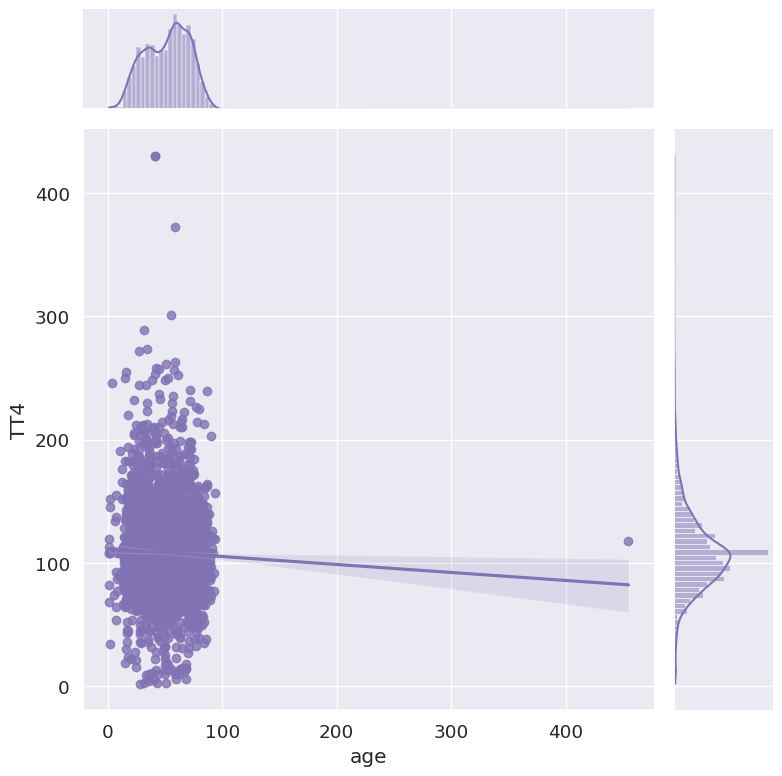

In [ ]:
sns.jointplot(x='age', y='TT4', data=df, kind='reg', height=8, color='m')

<ipython-input-58-40b41b1df846>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=False, bins=30, color='m')


<Axes: xlabel='age'>

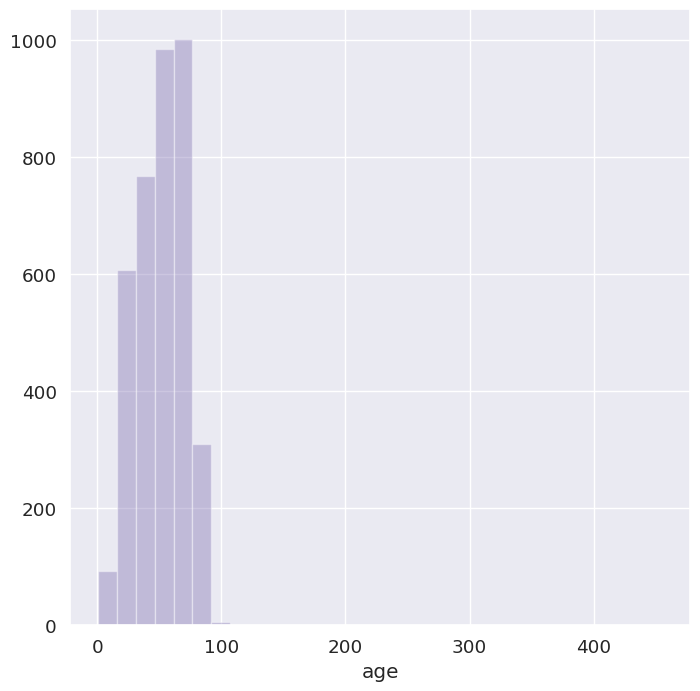

In [ ]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

<ipython-input-59-440fb6c08b16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='binaryClass', data=df, palette='rocket')


<Axes: xlabel='binaryClass', ylabel='count'>

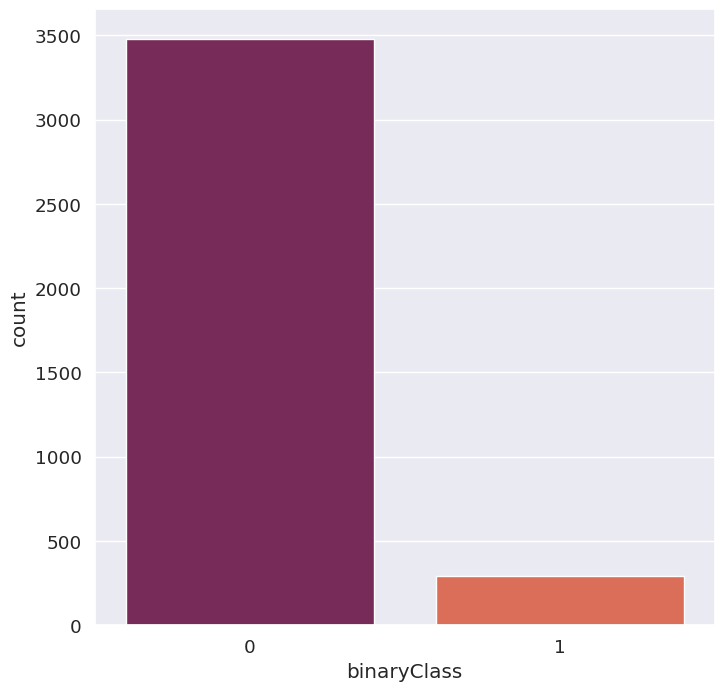

In [ ]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

<Axes: xlabel='binaryClass', ylabel='count'>

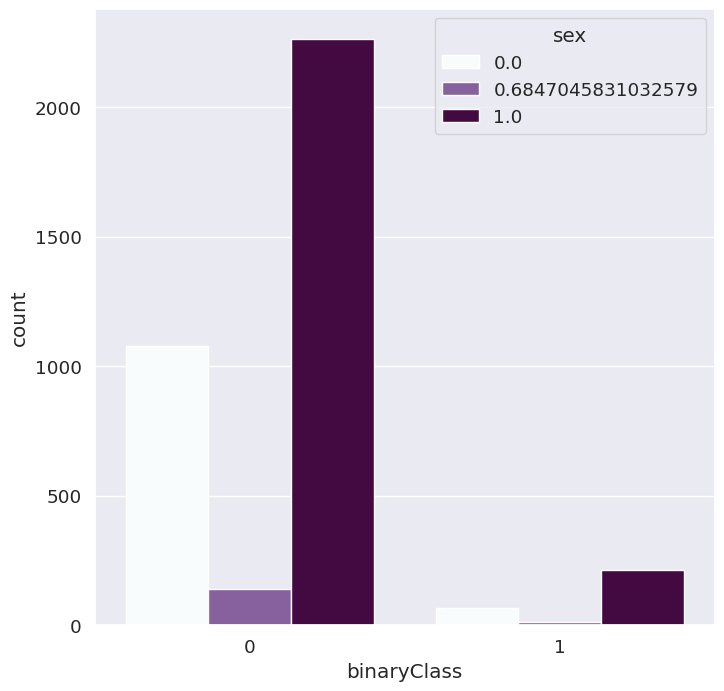

In [ ]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

<ipython-input-61-70359f1e7388>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")


<Axes: xlabel='binaryClass', ylabel='age'>

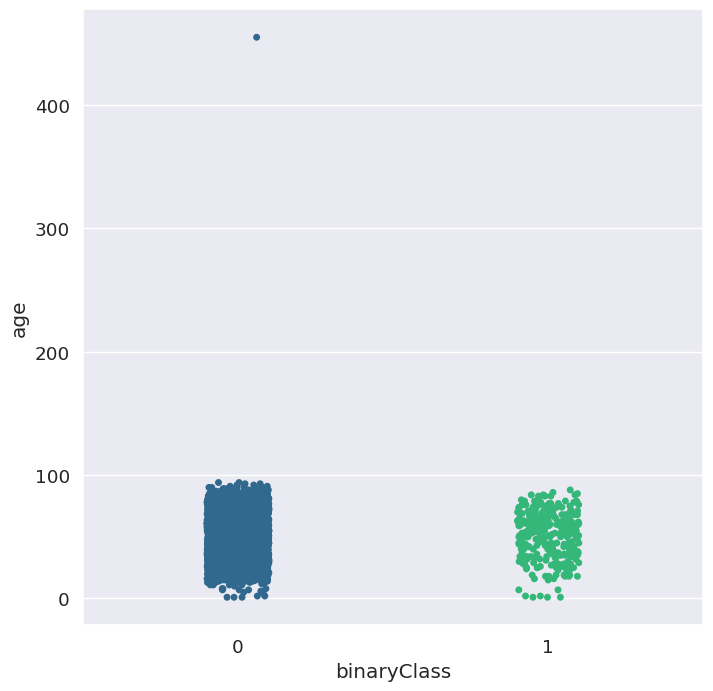

In [ ]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

<Axes: xlabel='binaryClass', ylabel='age'>

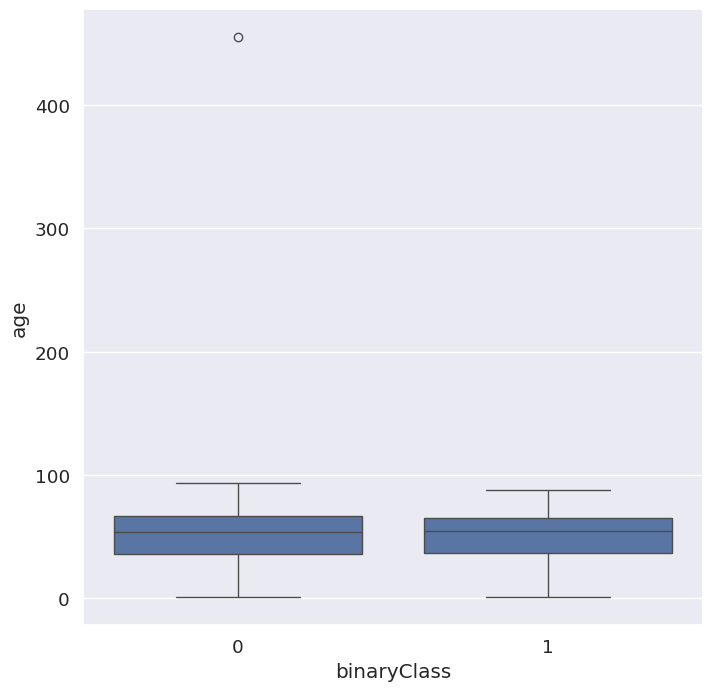

In [ ]:
sns.boxplot(x='binaryClass', y='age', data=df)

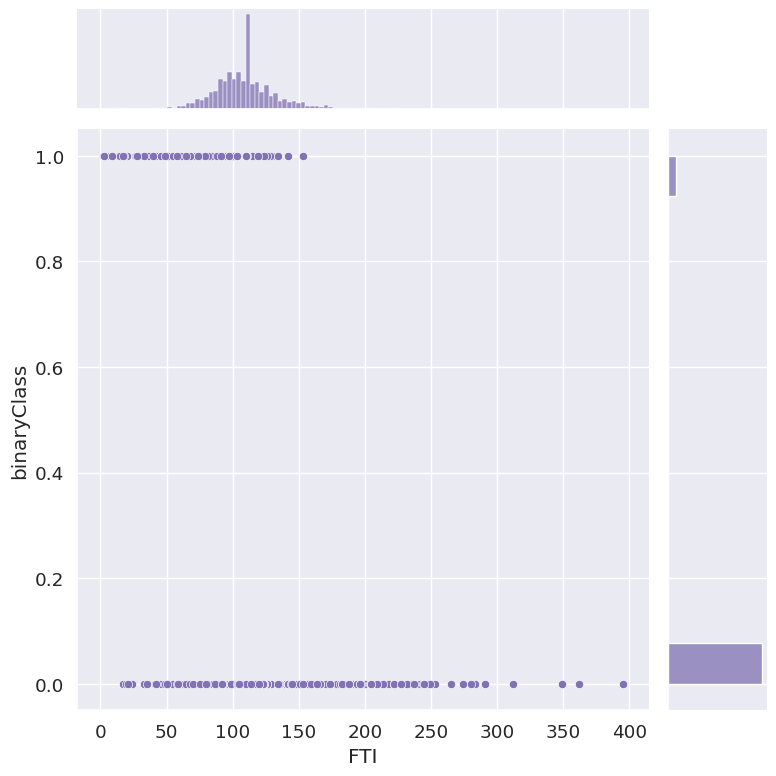

In [ ]:
sns.jointplot(x='FTI', y='binaryClass', data=df, kind='scatter', height=8, color='m')

In [ ]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.003606,0.014563,-0.017870,-0.063881,0.079468,-0.113521,-0.029502,0.052704,0.039562,...,7.311084e-02,-2.149247e-01,6.750898e-02,-3.760948e-02,8.536127e-02,-1.575229e-01,8.453378e-02,5.001749e-02,NaN,-0.003174
sex,0.003606,1.000000,0.098510,-0.043533,0.030484,-0.005755,0.079550,0.036586,0.020372,0.046353,...,-7.500437e-02,6.275929e-02,-7.387180e-02,1.669887e-01,-4.934307e-02,2.255718e-01,-5.016697e-02,3.853089e-02,NaN,0.050808
on thyroxine,0.014563,0.098510,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,-0.081060
query on thyroxine,-0.017870,-0.043533,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,-0.007448
on antithyroid medication,-0.063881,0.030484,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,-0.021689
sick,0.079468,-0.005755,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,-0.001749
pregnant,-0.113521,0.079550,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,-0.034516
thyroid surgery,-0.029502,0.036586,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,-0.017633
I131 treatment,0.052704,0.020372,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,0.003590
query hypothyroid,0.039562,0.046353,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,0.086282


<Axes: >

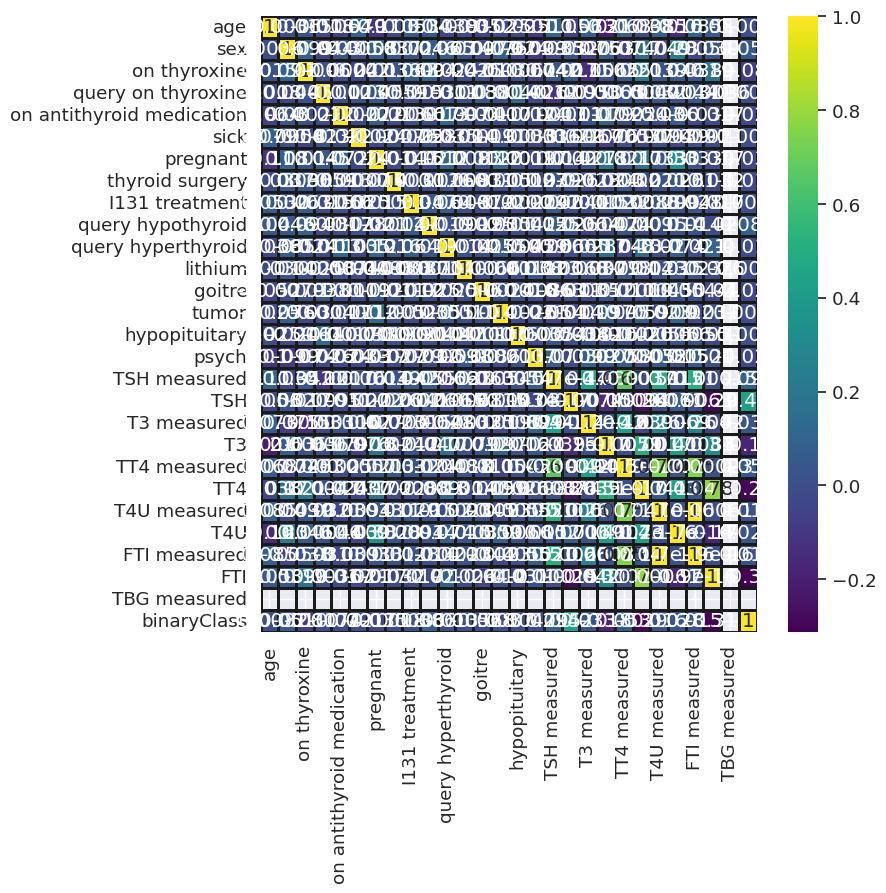

In [ ]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

In [ ]:
#df.dropna(axis = 0, inplace=True)

In [ ]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [ ]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

In [ ]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     48.57
Date:                Sat, 09 Mar 2024   Prob (F-statistic):          1.41e-213
Time:                        18:24:27   Log-Likelihood:                 179.17
No. Observations:                3772   AIC:                            -304.3
Df Residuals:                    3745   BIC:                            -136.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0334      0.058      0.578      0.563      -0.080       0.147
age                       -4.813e-05      0.000     -0.242      0.809      -0.000       0.000
sex                           0.0343      0.009      3.943      0.000       0.017       0.051
on thyroxine                 -0.0530      0.012     -4.339      0.000      -0.077      -0.029
query on thyroxine            0.0377      0.034      1.109      0.268      -0.029       0.104
on antithyroid medication    -0.0469      0.036     -1.299      0.194      -0.118       0.024
sick                         -0.0130      0.020     -0.660      0.509      -0.052       0.026
pregnant                     -0.0573      0.035     -1.654      0.098      -0.125       0.011
thyroid surgery              -0.0964      0.032     -2.989      0.003      -0.160      -0.033
I131 treatment               -0.0086      0.031     -0.279      0.780      -0.069       0.052
query hypothyroid             0.0718      0.016      4.520      0.000       0.041       0.103
query hyperthyroid            0.0258      0.016      1.593      0.111      -0.006       0.057
lithium                      -0.0436      0.055     -0.794      0.427      -0.151       0.064
goitre                       -0.0680      0.040     -1.693      0.091      -0.147       0.011
tumor                         0.0327      0.024      1.344      0.179      -0.015       0.080
hypopituitary                -0.2020      0.234     -0.862      0.389      -0.661       0.257
psych                        -0.0225      0.018     -1.258      0.208      -0.058       0.013
TSH measured                  0.1060      0.018      5.802      0.000       0.070       0.142
TSH                           0.0040      0.000     22.821      0.000       0.004       0.004
T3 measured                  -0.0199      0.011     -1.808      0.071      -0.041       0.002
T3                           -0.0216      0.006     -3.348      0.001      -0.034      -0.009
TT4 measured                  0.0202      0.029      0.704      0.481      -0.036       0.077
TT4                          -0.0016      0.000     -3.641      0.000      -0.002      -0.001
T4U measured                  0.1140      0.165      0.691      0.490      -0.209       0.437
T4U                           0.1602      0.055      2.920      0.004       0.053       0.268
FTI measured                 -0.1421      0.165     -0.863      0.388      -0.465       0.181
FTI                       -5.955e-05      0.000     -0.133      0.894      -0.001       0.001
TBG measured                       0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2079.207   Durbin-Watson:                   2.009
Prob(Omnibu

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [ ]:
x.shape

(3772, 28)

In [ ]:
x_train

,const,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
3571,1.0,26.0,1.0,0,0,0,0,0,0,0,...,2.300,1,2.0000,1,135.0,1,1.21,1,111.0,0
1775,1.0,52.0,1.0,1,0,0,0,0,0,0,...,44.000,1,2.5000,1,66.0,1,1.22,1,54.0,0
1424,1.0,31.0,1.0,0,0,0,0,0,0,0,...,0.100,1,3.2000,1,207.0,1,1.57,1,132.0,0
2516,1.0,70.0,1.0,0,0,0,0,0,0,0,...,1.100,1,2.6000,1,162.0,1,1.21,1,134.0,0
3198,1.0,23.0,1.0,0,0,0,0,0,0,0,...,1.900,1,1.6000,1,88.0,1,0.89,1,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,60.0,1.0,0,0,0,0,0,0,0,...,2.100,0,2.0135,1,127.0,1,1.01,1,126.0,0
1294,1.0,25.0,1.0,0,0,0,0,0,0,0,...,0.700,1,1.6000,1,94.0,1,0.93,1,101.0,0
860,1.0,65.0,1.0,1,0,0,0,0,0,0,...,0.015,1,3.1000,1,168.0,1,0.98,1,171.0,0
3507,1.0,73.0,1.0,1,0,0,0,0,0,0,...,0.030,1,1.7000,1,127.0,1,0.89,1,143.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
sc.fit(x_test)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.        , -1.25724849,  0.69719436, ...,  0.33666185,
         0.01223448,  0.        ],
       [ 0.        ,  0.01615716,  0.69719436, ...,  0.33666185,
        -1.78005475,  0.        ],
       [ 0.        , -1.01236279,  0.69719436, ...,  0.33666185,
         0.67255156,  0.        ],
       ...,
       [ 0.        ,  0.65285999,  0.69719436, ...,  0.33666185,
         1.89885472,  0.        ],
       [ 0.        ,  1.04467711,  0.69719436, ...,  0.33666185,
         1.01843194,  0.        ],
       [ 0.        ,  1.14263139, -1.49535706, ...,  0.33666185,
         1.89885472,  0.        ]])

<img src="https://lh3.googleusercontent.com/proxy/dmZ-7K8n0tfjlAlmjL316IQymLkEUejTyRJe_PvnpoIvDzoDixx_4L1JmNBYg0xhdyywrCkkjD9F5Snp7PJU8N6RFZ0ke4IO9wMe5c2xbJvC" width="800px">

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
x.shape

(3772, 28)

In [ ]:
x.shape[1]

28

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7424      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 63)                8127      
                                                                 
 dropout_2 (Dropout)         (None, 63)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)


Epoch 1/100
40/40 [==============================] - 2s 12ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0159 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 2/100
17/40 [===========>..................] - ETA: 0s - loss: 0.0229 - accuracy: 0.9908

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 0.0509 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0357 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 1s 23ms/step - loss: 0.0177 - accuracy: 0.9910 - val_loss: 0.0329 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0162 - accuracy: 0.9957 - val_loss: 0.0411 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.9953 - val_loss: 0.0522 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9965 - val_loss: 0.0316 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 8/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0180 - accu

In [ ]:
loss,accuracy=model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9873


In [ ]:
accuracy

0.9872746467590332

In [ ]:
loss

0.06108392775058746

In [ ]:
y_pred = model.predict(x_test)
# y_pred

30/30 [==============================] - 0s 2ms/step


In [ ]:
# y_pred

In [ ]:
y_test

270     0
2071    1
3660    0
3207    0
1675    0
       ..
1791    0
2132    0
162     0
1885    0
219     0
Name: binaryClass, Length: 943, dtype: int64

In [ ]:
%%time
# model.evaluate(x_test, y_test)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


In [ ]:
# model.predict(x_test)

In [ ]:
# model.predict_classes(x_test)[1]

In [ ]:
predictions = (y_pred > 0.5).astype("int32")

In [ ]:
# y_test

In [ ]:
predictions

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# y_test.iloc[1]

In [ ]:
model.predict(x_test)[70]

30/30 [==============================] - 0s 2ms/step


array([2.1850195e-28], dtype=float32)

In [ ]:
x_test.shape

(943, 28)

In [ ]:
# model.predict_classes(x_test)[70]

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

30/30 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
y_test

270     0
2071    1
3660    0
3207    0
1675    0
       ..
1791    0
2132    0
162     0
1885    0
219     0
Name: binaryClass, Length: 943, dtype: int64

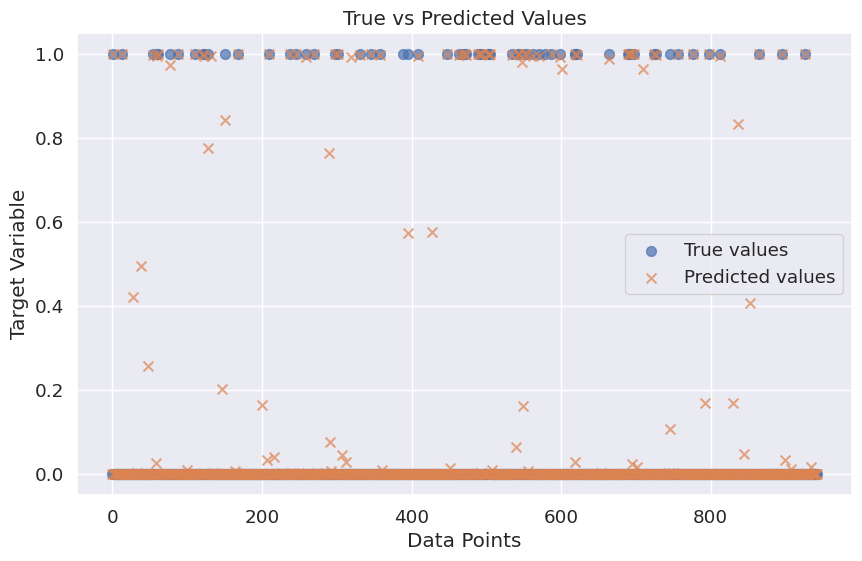

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='True values', alpha=0.7, marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted values', alpha=0.7, marker='x', s=50)
plt.title('True vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
# model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

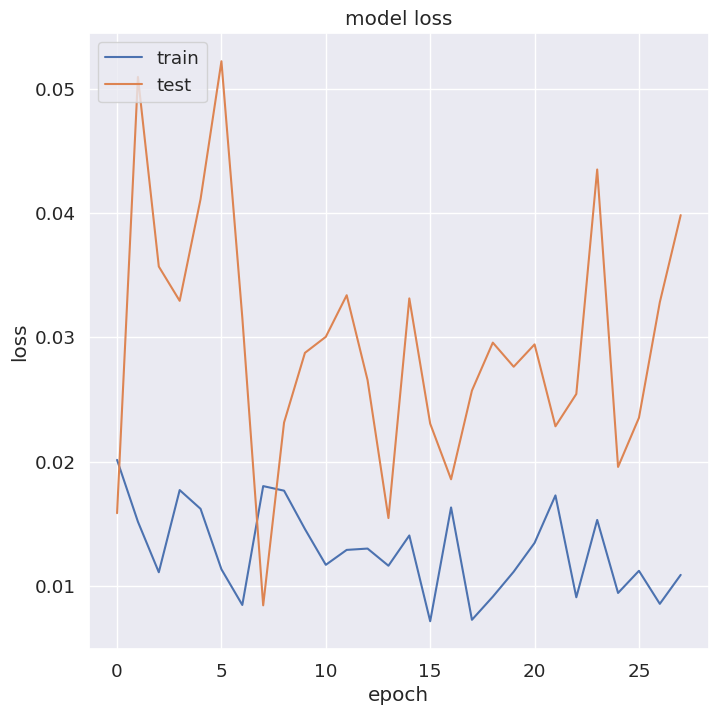

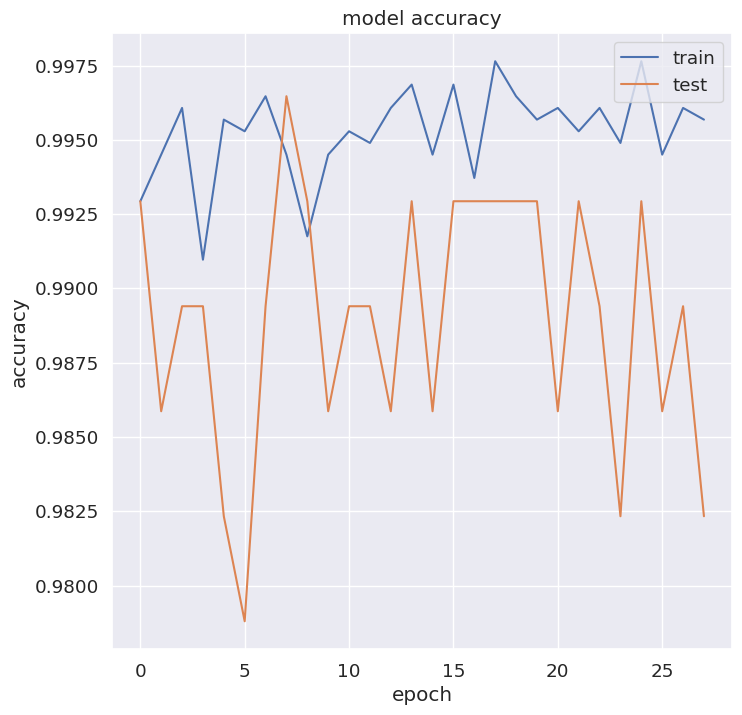

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import joblib

In [ ]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [ ]:
sc = joblib.load('scaler.pkl')

In [ ]:
%%time
from tensorflow.keras.models import load_model
model = load_model('model.h5')
# model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

CPU times: user 118 ms, sys: 2.89 ms, total: 121 ms
Wall time: 121 ms


In [ ]:
x_test.shape

(943, 28)

In [ ]:
import numpy as np

# demo_indices = [0, 3, 7, 15]  # Replace with the indices you want

# Extract the chosen rows from x_test
interval = 30

# Extract rows at intervals of 30 from x_test
x_demonstrate = x_test[::interval]
y_demonstrate = y_test[::interval]

# Make predictions for the demonstration subset
predictions = (model.predict(x_demonstrate) > 0.5).astype("int32")

# Concatenate predictions and actual outputs horizontally
result = np.column_stack((predictions, y_demonstrate))

# Print the concatenated result
print("Demonstration Predictions and Actual Outputs:")
print(result)


1/1 [==============================] - 0s 121ms/step
Demonstration Predictions and Actual Outputs:
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


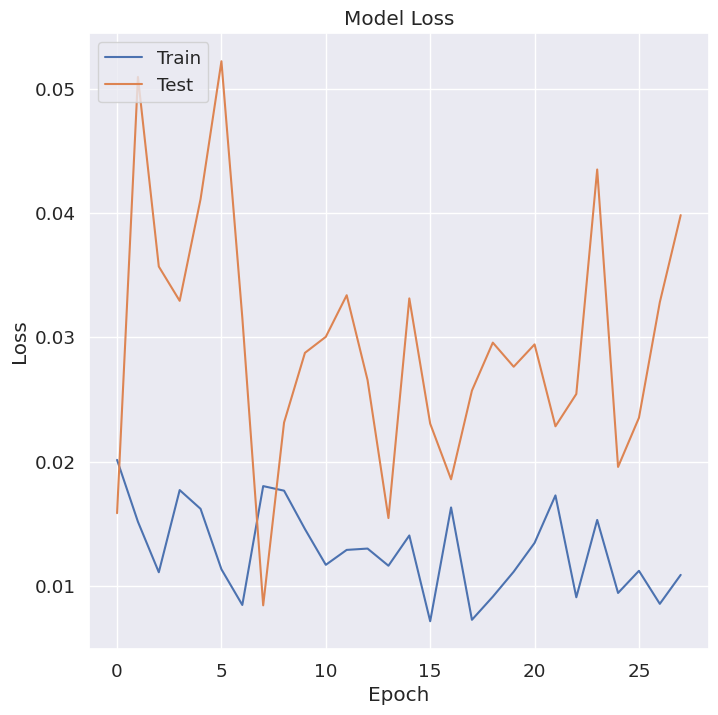

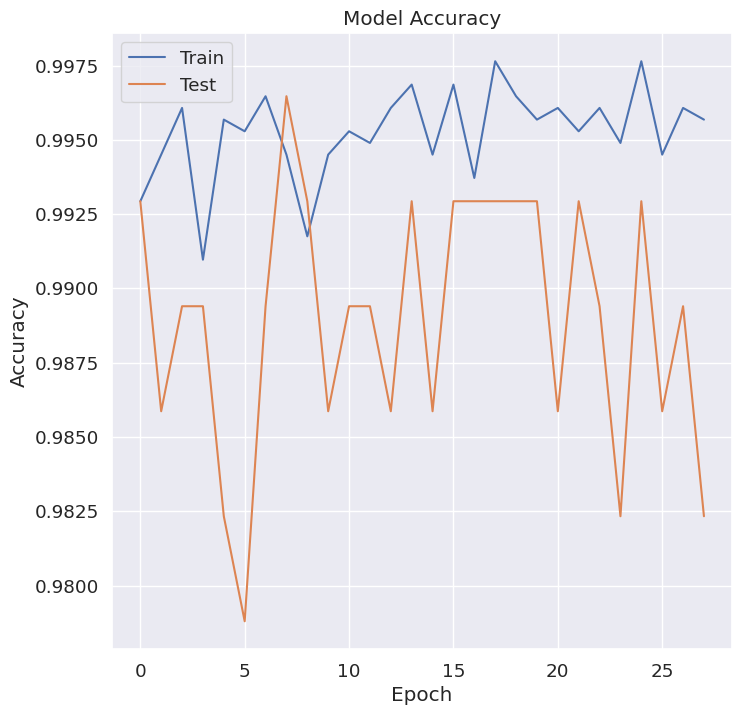

KeyError: 'precision'

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize precision, recall, and F1 score
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score'], loc='upper left')
plt.show()
